In [17]:
import sklearn
from sklearn.neural_network import MLPRegressor
from sklearn.dummy import DummyRegressor
from sklearn.metrics import mean_absolute_error
import numpy as np
from tensorflow.keras import datasets
import matplotlib.pyplot as plt

In [18]:
(x_train, y_train), (x_test, y_test) = datasets.boston_housing.load_data()

In [19]:
len(x_train)

404

In [20]:
layer_sizes = (100)
alpha = 0.0001 # alpha used by L2 regularization
batch_size = 10
step_size = 0.0000001


constant_model = MLPRegressor(solver="sgd", batch_size=batch_size, learning_rate_init=step_size)
adam_model = MLPRegressor(solver="adam", batch_size=batch_size)


In [21]:
def partial_train_loop(model: sklearn.neural_network._multilayer_perceptron.MLPRegressor, n_epochs: int, train_data:np.ndarray, train_labels:np.ndarray, test_data:np.ndarray, test_labels:np.ndarray):
    errors = []
    losses = []
    for epoch in range(n_epochs):
        model.partial_fit(train_data, train_labels)
        preds = model.predict(test_data)
        errors.append(mean_absolute_error(test_labels, preds))
        losses.append(model.loss_)


    return model, errors, losses

In [22]:
mod, errs, loss = partial_train_loop(constant_model, 50, x_train, y_train, x_test, y_test)

## altering constant step size

<ipython-input-23-c5925efe98c3>:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(2, 1, 1)
<ipython-input-23-c5925efe98c3>:17: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(2, 1, 2)
<ipython-input-23-c5925efe98c3>:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created an

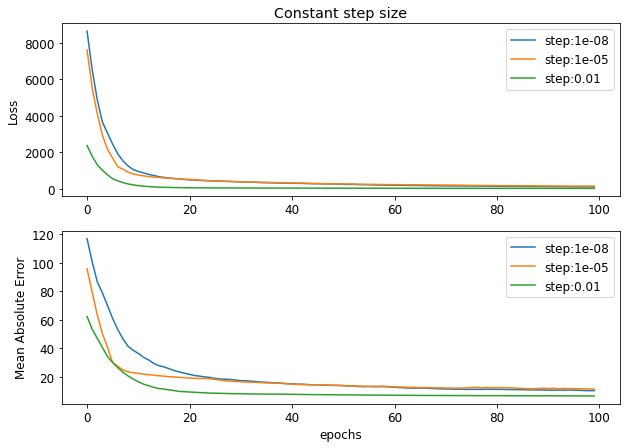

In [23]:
step_sizes = [1e-8, 1e-5, 0.01]
# passing in model causes trinaing to carry over.
# step_sizes = [1e-8, 0.1]
plt.figure('step size',figsize=[10,7])
plt.rc('font', size=12)
for step in step_sizes:
    constant_model = MLPRegressor(solver="sgd",  learning_rate_init=step_size, momentum=0)

    mod, errs, loss = partial_train_loop(constant_model, 100, x_train, y_train, x_test, y_test)
    
    plt.subplot(2, 1, 1)
    plt.ylabel('Loss')
    plt.title("Constant step size")
    plt.plot(range(len(loss)), loss, label = f"step:{step}")
    plt.legend()

    plt.subplot(2, 1, 2)
    plt.xlabel("epochs")
    plt.ylabel('Mean Absolute Error')
    plt.plot(range(len(errs)), errs, label = f"step:{step}")
# plt.title("mae")
plt.legend()


## constant step batch size

## adam alpha

<ipython-input-24-3b6d049fe27b>:9: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(2, 1, 1)
<ipython-input-24-3b6d049fe27b>:16: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(2, 1, 2)
<ipython-input-24-3b6d049fe27b>:9: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and 

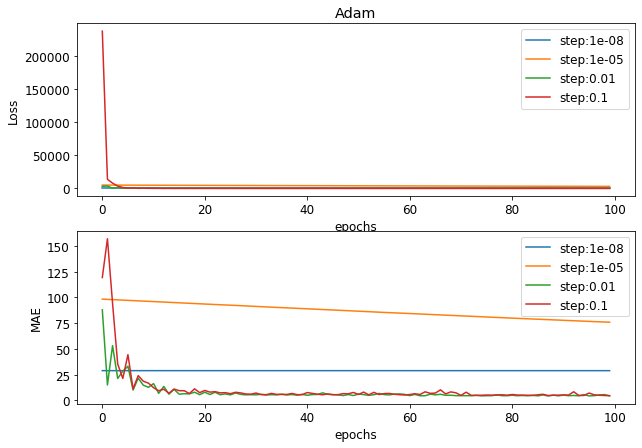

In [24]:
step_sizes = [1e-8, 1e-5, 0.01, 0.1 ]
plt.figure(figsize=[10,7])
plt.rc('font', size=12)
for step in step_sizes:
    adam_model = MLPRegressor(solver="adam", learning_rate_init=step)

    mod, errs, loss = partial_train_loop(adam_model, 100, x_train, y_train, x_test, y_test)
    
    plt.subplot(2, 1, 1)
    plt.title("Adam")
    plt.plot(range(len(loss)), loss, label = f"step:{step}")
    plt.xlabel('epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(2, 1, 2)
    plt.xlabel('epochs')
    plt.ylabel('MAE')
    plt.plot(range(len(errs)), errs, label = f"step:{step}")
plt.legend()

## adam beta 1

<ipython-input-25-7d5daaa7b91b>:9: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(2, 1, 1)
<ipython-input-25-7d5daaa7b91b>:16: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(2, 1, 2)
<ipython-input-25-7d5daaa7b91b>:9: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and 

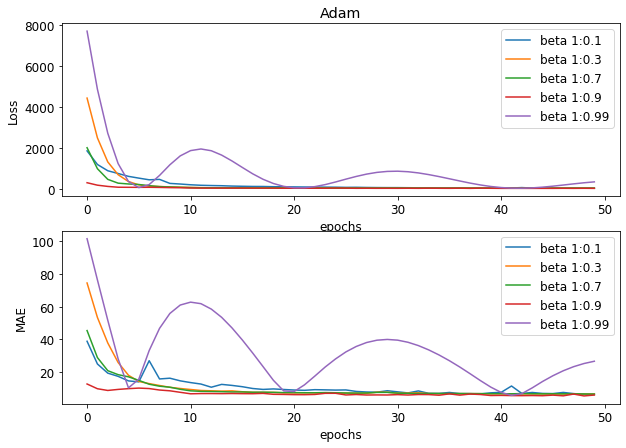

In [25]:
beta1_vals = [0.1, 0.3, 0.7, 0.9, 0.99]
plt.figure('beta1',figsize=[10,7])
plt.rc('font', size=12)
for bet1 in beta1_vals:
    adam_model = MLPRegressor(solver="adam", beta_1=bet1)

    mod, errs, loss = partial_train_loop(adam_model, 50, x_train, y_train, x_test, y_test)
    
    plt.subplot(2, 1, 1)
    plt.title("Adam")
    plt.plot(range(len(loss)), loss, label = f"beta 1:{bet1}")
    plt.xlabel('epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(2, 1, 2)
    plt.xlabel('epochs')
    plt.ylabel('MAE')
    plt.plot(range(len(errs)), errs, label = f"beta 1:{bet1}")

plt.legend()

## adam beta 2

<ipython-input-26-c01e88c05e9d>:9: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(2, 1, 1)
<ipython-input-26-c01e88c05e9d>:16: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(2, 1, 2)
<ipython-input-26-c01e88c05e9d>:9: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and 

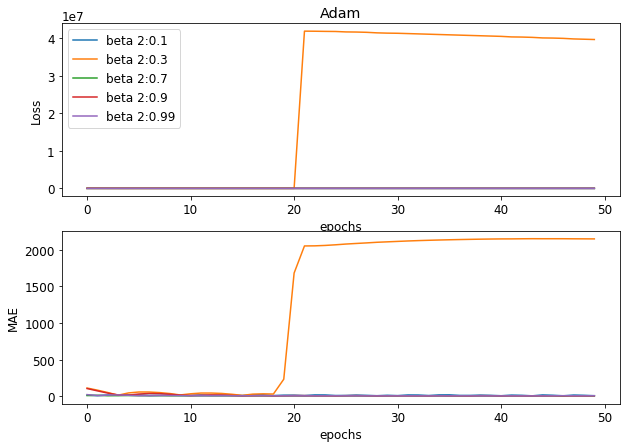

In [26]:
beta2_vals = [0.1, 0.3, 0.7, 0.9, 0.99]
plt.figure('beta2',figsize=[10,7])
plt.rc('font', size=12)
for bet2 in beta2_vals:
    adam_model = MLPRegressor(solver="adam", beta_2=bet2)

    mod, errs, loss = partial_train_loop(adam_model, 50, x_train, y_train, x_test, y_test)
    
    plt.subplot(2, 1, 1)
    plt.title("Adam")
    plt.plot(range(len(loss)), loss, label = f"beta 2:{bet2}")
    plt.xlabel('epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(2, 1, 2)
    plt.xlabel('epochs')
    plt.ylabel('MAE')
    plt.plot(range(len(errs)), errs, label = f"beta 2:{bet2}")

## ideal batchsize

In [27]:
dummy_regr = DummyRegressor(strategy="mean")
dummy_regr.fit(x_train, y_train)
dummy_mae = mean_absolute_error(y_test,dummy_regr.predict(x_test))

Text(0.5, 0, 'epochs')

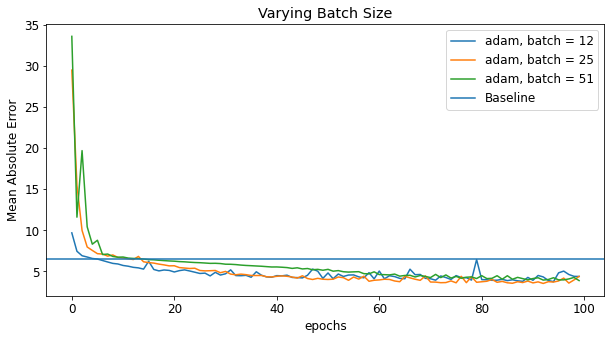

In [36]:
batch_sizes = [12,25,51 ] # default = 200
# passing in model causes trinaing to carry over.
# step_sizes = [1e-8, 0.1]
plt.figure('Batch Size Constant Step',figsize=[10,5])
plt.rc('font', size=12)
for batch in batch_sizes:
    # constant_model = MLPRegressor(solver="sgd", batch_size=batch, momentum=0, learning_rate_init=0.1)
    adam_model = MLPRegressor(solver="adam", batch_size=batch)
    # mod, errs, loss = partial_train_loop(constant_model, 100, x_train, y_train, x_test, y_test)
    adam_mod, adam_errs, adam_loss = partial_train_loop(adam_model, 100, x_train, y_train, x_test, y_test)


    # plt.plot(range(len(errs)), errs, label = f"constant, batch = {batch}")
    plt.plot(range(len(adam_errs)), adam_errs, label = f"adam, batch = {batch}")

# plt.plot(range(len(dummy_mae)),dummy_mae, label = "dumm")
plt.axhline(y = dummy_mae, label = 'Baseline')
plt.legend()
plt.title("Varying Batch Size")
plt.ylabel("Mean Absolute Error")
plt.xlabel('epochs')


Text(0.5, 1.0, 'Varying Batch Size, Constant')

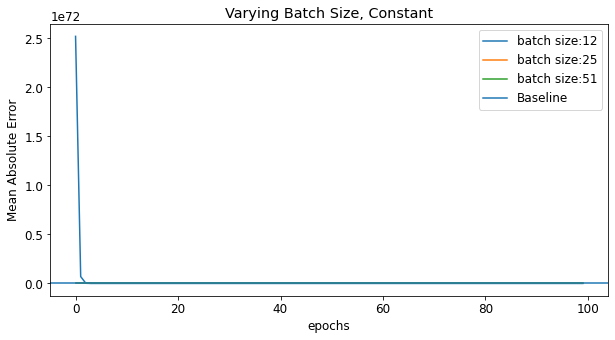

In [42]:
batch_sizes = [12, 25, 51] # default = 200
# passing in model causes trinaing to carry over.
# step_sizes = [1e-8, 0.1]
plt.figure('Batch Size Constant Step',figsize=[10,5])
plt.rc('font', size=12)
for batch in batch_sizes:
    constant_model = MLPRegressor(solver="sgd", batch_size=batch, learning_rate_init=0.1, momentum=0)

    mod, errs, loss = partial_train_loop(constant_model, 100, x_train, y_train, x_test, y_test)
    

    # plt.subplot(2, 1, 2)
    plt.xlabel("epochs")
    plt.ylabel('Mean Absolute Error')
    plt.plot(range(len(errs)), errs, label = f"batch size:{batch}")
plt.axhline(y = dummy_mae, label = 'Baseline')


plt.legend()
plt.title('Varying Batch Size, Constant')

calc mean time taken and mean mae after 100 epochs

In [30]:
import time
iters = 10
err_sum = 0
loss_sum = 0
curr_time = time.time_ns()
for i in range(iters):
    adam_model = MLPRegressor(solver="adam", batch_size=51)
    adam_mod, adam_errs, adam_loss = partial_train_loop(adam_model, 500, x_train, y_train, x_test, y_test)
    err_sum += min(adam_errs)
    loss_sum += min(adam_loss)
adam_time = time.time_ns()- curr_time
adam_err = err_sum/iters
adam_loss_mean = loss_sum/iters

In [31]:
err_sum = 0
# iters = 3
curr_time = time.time_ns()
for i in range(iters):
    constant_model = MLPRegressor(solver="sgd", batch_size=51, momentum=0, learning_rate_init=0.1)
    mod, errs, loss = partial_train_loop(constant_model, 500, x_train, y_train, x_test, y_test)
    err_sum += min(errs)
    loss_sum += min(loss)
const_time = time.time_ns()- curr_time
const_err = err_sum/iters
loss_mean = loss_sum/iters

In [32]:
dummy_mae

6.533042127742185

In [33]:
print(f"adam time {adam_time/1e9}\nconstant time {const_time/1e9}")

adam time 40.9711439
constant time 36.1811366


In [34]:
print(f"adam error {adam_err}\nconstant error {const_err}")
print(f"adam loss {adam_loss_mean}\nconstant loss {loss_mean}")

adam error 3.2987039665859705
constant error 6.518603874791704
adam loss 5.141743817512199
constant loss 2.3649919654546304e+151
